**Клевицкий Дмитрий 27.09.24**

1) На семинаре разобрали алгоритмы Дейсктры и Беллмана-Форда для нахождения минимального и кратчайшего пути между вершинами
2) Обсудили тему ИП
3) Тема индивидуального проекта закреплена за мной, буду начинать работу над проектом

In [1]:
import networkx as nx

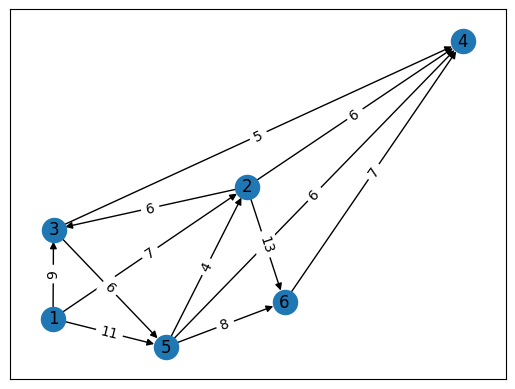

In [11]:
edges = [
    (1, 2, 7), (1, 3, 9), (2, 3, 6), (2, 4, 6), (3, 4, 5),
    (1, 5, 11), (5, 2, 4), (3, 5, 6), (5, 6, 8), (2, 6, 13),
    (6, 4, 7), (5, 4, 6)
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

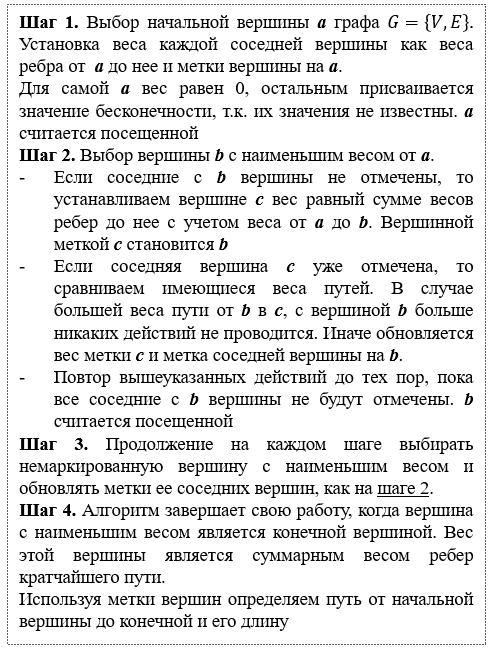

In [35]:
import heapq

def dijkstra(graph, start, end):
    min_heap = [(0, start)]
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    previous_vertices = {vertex: None for vertex in graph}
    
    while min_heap:
        current_distance, current_vertex = heapq.heappop(min_heap)

        if current_vertex == end:
            break

        if current_distance > distances[current_vertex]:
            continue

        # Шаг 2. Обработка соседей
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight['weight']

            # Если найден меньший путь к соседней вершине
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
                heapq.heappush(min_heap, (distance, neighbor))

    path = []
    current_vertex = end
    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = previous_vertices[current_vertex]
        
    path.reverse()

    return path, distances[end]



print(f"Путь и длина от 1 до 4: {dijkstra(nx.to_dict_of_dicts(G), 1, 4)}")
print(f"Путь и длина от 3 до 6: {dijkstra(nx.to_dict_of_dicts(G), 3, 6)}")
print(f"Путь и длина от 1 до 4: {dijkstra(nx.to_dict_of_dicts(G), 1, 6)}")

Путь и длина от 1 до 4: ([1, 2, 4], 13)
Путь и длина от 3 до 6: ([3, 5, 6], 14)
Путь и длина от 1 до 4: ([1, 5, 6], 19)


# ДЗ

**Используя Алгоритм Беллмана-Форда найти минимальный путь и длину**

а) от вершины 1 до вершины 7\
б) от вершины 3 до вершины 6\
в) от вершины 2 до вершины 7\
г) поменять случайным образом от 1 до 7 ребер графа и поменять их веса в диапазоне (-10; 10) 

In [14]:
import networkx as nx
from random import randint

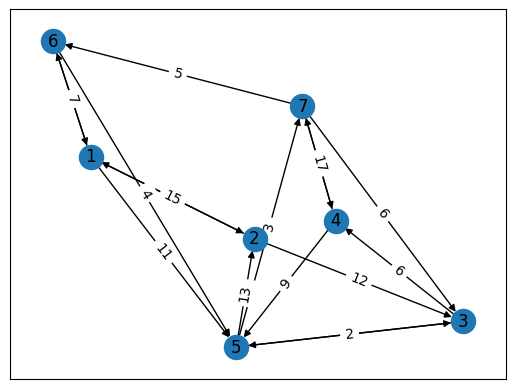

In [23]:
edges = [
    (1, 2, 1), (2, 1, 15), (2, 3, 12), (3, 4, 6),
    (4, 5, 9), (6, 5, 4), (1, 5, 11), (5, 2, 13),
    (5, 3, 2), (3, 5, 1), (5, 7, 3), (6, 1, 7),
    (1, 6, 8), (7, 6, 5), (7, 4, 17), (4, 7, 7),
    (7, 3, 6)
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, arrows=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [13]:
print(f"от 1 до 7: {nx.bellman_ford_path(G, 1, 7)}, {nx.bellman_ford_path_length(G, 1, 7)}")
print(f"от 3 до 6: {nx.bellman_ford_path(G, 3, 6)}, {nx.bellman_ford_path_length(G, 3, 6)}")
print(f"от 2 до 7: {nx.bellman_ford_path(G, 2, 7)}, {nx.bellman_ford_path_length(G, 2, 7)}")

от 1 до 7: [1, 5, 7], 14
от 3 до 6: [3, 5, 7, 6], 9
от 2 до 7: [2, 3, 5, 7], 16


In [25]:
G[1][5]['weight'] = randint(-10, 10)
nx.get_edge_attributes(G, name="weight")

{(1, 2): 1,
 (1, 5): -10,
 (1, 6): 8,
 (2, 1): 15,
 (2, 3): 12,
 (3, 4): 6,
 (3, 5): 1,
 (4, 5): 9,
 (4, 7): 7,
 (5, 2): 13,
 (5, 3): 2,
 (5, 7): 3,
 (6, 5): 4,
 (6, 1): 7,
 (7, 6): 5,
 (7, 4): 17,
 (7, 3): 6}

In [26]:
print(f"от 1 до 7: {nx.bellman_ford_path(G, 1, 7)}, {nx.bellman_ford_path_length(G, 1, 7)}")

от 1 до 7: [1, 5, 7], -7
